# **Telecom X - Análisis de Evasión de Clientes**

---



* Proyecto: "Churn de clientes"
* Descripción:
 * La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

* Desafío:
 * Recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa

## **1.Cargar datos**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import requests
from pprint import pprint
import warnings
warnings.filterwarnings('ignore')

## **📌 Extracción**

In [20]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

# 1.  Descargar el texto del archivo
response = requests.get(url)
data = json.loads(response.text)

# 2. Verificar el tipo de dato: list o dict
print(f"Tipo de dato {type(data)}")

# 3. Analizar los datos segun el tipo de dato
if isinstance(data, list):
  pprint(data[0], depth=2)
elif isinstance(data, dict):
  pprint(data[0], depth=2)
else:
  print('Tipo de dato desconocido')


Tipo de dato <class 'list'>
{'Churn': 'No',
 'account': {'Charges': {...},
             'Contract': 'One year',
             'PaperlessBilling': 'Yes',
             'PaymentMethod': 'Mailed check'},
 'customer': {'Dependents': 'Yes',
              'Partner': 'Yes',
              'SeniorCitizen': 0,
              'gender': 'Female',
              'tenure': 9},
 'customerID': '0002-ORFBO',
 'internet': {'DeviceProtection': 'No',
              'InternetService': 'DSL',
              'OnlineBackup': 'Yes',
              'OnlineSecurity': 'No',
              'StreamingMovies': 'No',
              'StreamingTV': 'Yes',
              'TechSupport': 'Yes'},
 'phone': {'MultipleLines': 'No', 'PhoneService': 'Yes'}}


## **🔧 Transformación**

## **Normalizar el archivo JSON**

In [21]:
# Normalizar el archivo JSON
df = pd.json_normalize(data,sep='.')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **Conozce el conjunto de datos**

## **✅ Explorar las columnas del dataset y verificar sus tipos de datos.**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## **✅ Consultar el diccionario para comprender mejor el significado de las variables.**

### **Diccionario de datos**

* customerID: número de identificación único de cada cliente
* Churn: si el cliente dejó o no la empresa
* gender: género (masculino y femenino)
* SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripción al servicio telefónico
* MultipleLines: suscripción a más de una línea telefónica
* InternetService: suscripción a un proveedor de internet
* OnlineSecurity: suscripción adicional de seguridad en línea
* OnlineBackup: suscripción adicional de respaldo en línea
* DeviceProtection: suscripción adicional de protección del dispositivo
* TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
* StreamingTV: suscripción de televisión por cable
* StreamingMovies: suscripción de streaming de películas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en línea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

## **Manejo de inconsistencias**
normalizar todas los registros category y columnas a minúscula

In [24]:
# Normalizar las columnas a minúsculas
df.columns=df.columns.str.lower()

# Aplicar minúsculas solo a columnas de tipo objeto (strings)
for col in df.select_dtypes(include='object'):
  df[col] = df[col].str.lower()

## **Comprobación de incoherencias en los datos**

* Convertir a su tipo de dato correcto

In [25]:
# ✅ 1. Convertir columnas a tipo category y normalizar a minúsculas
col_cats = ['churn', 'customer.gender', 'customer.partner', 'customer.dependents',
            'phone.phoneservice', 'phone.multiplelines', 'internet.internetservice',
            'internet.onlinesecurity', 'internet.onlinebackup', 'internet.deviceprotection',
            'internet.techsupport', 'internet.streamingtv', 'internet.streamingmovies',
            'account.contract', 'account.paperlessbilling', 'account.paymentmethod']

df[col_cats] = df[col_cats].astype('category')

In [26]:
#✅ 2. Asegurar que SeniorCitizen y tenure sean enteros (int64)
df['customer.seniorcitizen'] = df['customer.seniorcitizen'].astype('int64')
df['customer.tenure'] = df['customer.tenure'].astype('int64')

In [27]:
# Corregir la variable 'account.Charges.Total'

In [28]:
#✅ 3. Asegurar que los cargos sean flotantes (float64)
df['account.charges.monthly'] = df['account.charges.monthly'].astype('float64')

* Corregir la variable 'account.Charges.Total'

In [29]:
# 1. Reemplazar los espacios en blanco por una expresion regular
df['account.charges.total'] = df['account.charges.total'].replace(r'^\s*$', pd.NA, regex=True)

# 2. Quitar los espacios en blanco al inicio y al final
df['account.charges.total'] = df['account.charges.total'].str.strip()

# # 3. Convertir a float (saltará los NaN automáticamente)
df['account.charges.total'] = pd.to_numeric(df['account.charges.total'], errors='coerce')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerid                 7267 non-null   object  
 1   churn                      7267 non-null   category
 2   customer.gender            7267 non-null   category
 3   customer.seniorcitizen     7267 non-null   int64   
 4   customer.partner           7267 non-null   category
 5   customer.dependents        7267 non-null   category
 6   customer.tenure            7267 non-null   int64   
 7   phone.phoneservice         7267 non-null   category
 8   phone.multiplelines        7267 non-null   category
 9   internet.internetservice   7267 non-null   category
 10  internet.onlinesecurity    7267 non-null   category
 11  internet.onlinebackup      7267 non-null   category
 12  internet.deviceprotection  7267 non-null   category
 13  internet.techsupport       7267 n

In [31]:
df.describe()

,customer.seniorcitizen,customer.tenure,account.charges.monthly,account.charges.total
count,7267.000000,7267.000000,7267.000000,7256.000000
mean,0.162653,32.346498,64.720098,2280.634213
std,0.369074,24.571773,30.129572,2268.632997
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.425000,400.225000
50%,0.000000,29.000000,70.300000,1391.000000
75%,0.000000,55.000000,89.875000,3785.300000
max,1.000000,72.000000,118.750000,8684.800000


## **Verificando los valores nulos**

In [32]:
# Verificando los valores nulos en 'account.Charges.Total'
nulos_act = df['account.charges.total'].isnull().sum()
print(f"La cantidad de nulos es: {nulos_act}")

La cantidad de nulos es: 11


* Dado que la cantidad de nulos es pequeña, menos del 5% del dataset,
usamos el metodo de imputacion con estadística avanzada usando la librería fancyimpute

In [33]:
#pip install fancyimpute

## **Imputando los valores nulos**

In [34]:
# Importar la librería
from fancyimpute import IterativeImputer

In [35]:
 # 1. Copiar el DataFrame original
 df_impute = df.copy(deep=True)

# 2. Reshape de la columna a 2D antes de imputar
mice_imputer = IterativeImputer()

# .values.reshape(-1, 1) convierte la serie en una matriz columna
col_imputed = mice_imputer.fit_transform(df_impute[['account.charges.total']])

# 3. Reasignar la columna imputada al DataFrame
df_impute['account.charges.total'] = col_imputed

#Verificar que no haya valores nulos
nulos = df_impute['account.charges.total'].isnull().sum()
print(f"Total de nulos: {nulos}")

Total de nulos: 0


In [36]:
# Asignar a la columna del dataframe original
df['account.charges.total'] = df_impute['account.charges.total']

## **Verificar duplicados**

In [37]:
duplicados = df.duplicated().sum()
print(f"Cantidad de duplicados: {duplicados}")

Cantidad de duplicados: 0


# **Crear la Columna de cuentas diarias**
* "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [38]:
df['cuentas_diarias'] = df['account.charges.monthly'] / 30
df['cuentas_diarias'].head()

,cuentas_diarias
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667


## **Estandarización y transformación de datos**
* Descripción
 * Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

 * Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerid                 7267 non-null   object  
 1   churn                      7267 non-null   category
 2   customer.gender            7267 non-null   category
 3   customer.seniorcitizen     7267 non-null   int64   
 4   customer.partner           7267 non-null   category
 5   customer.dependents        7267 non-null   category
 6   customer.tenure            7267 non-null   int64   
 7   phone.phoneservice         7267 non-null   category
 8   phone.multiplelines        7267 non-null   category
 9   internet.internetservice   7267 non-null   category
 10  internet.onlinesecurity    7267 non-null   category
 11  internet.onlinebackup      7267 non-null   category
 12  internet.deviceprotection  7267 non-null   category
 13  internet.techsupport       7267 n

In [40]:
#✅ 1. Conversión de valores textuales a binarios (Sí/No → 1/0)
# Lista de columnas binarias
cols_binarias = ['customer.partner', 'customer.dependents', 'phone.phoneservice',
                 'phone.multiplelines', 'internet.onlinesecurity', 'internet.onlinebackup',
                 'internet.deviceprotection', 'internet.techsupport',
                 'internet.streamingtv', 'internet.streamingmovies',
                 'account.paperlessbilling', 'churn']

# Ahora convierte 'yes' a 1 y 'no' a 0
df[cols_binarias] = df[cols_binarias].applymap(lambda x: 1 if x == 'yes' else 0)

# Finalmente, asegúrate de que las columnas sean de tipo 'int64'
df[cols_binarias] = df[cols_binarias].astype('int64')


In [41]:
df.head()

,customerid,churn,customer.gender,customer.seniorcitizen,customer.partner,customer.dependents,customer.tenure,phone.phoneservice,phone.multiplelines,internet.internetservice,...,internet.deviceprotection,internet.techsupport,internet.streamingtv,internet.streamingmovies,account.contract,account.paperlessbilling,account.paymentmethod,account.charges.monthly,account.charges.total,cuentas_diarias
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [42]:

# Convertir las columnas a tipo int64
df[cols_binarias] = df[cols_binarias].astype('int64')

In [43]:
# ✅ 2. Renombrar columnas a nombres más amigables
df.rename(columns={
    'customer.gender': 'genero',
    'customer.partner': 'tiene_pareja',
    'customer.dependents': 'tiene_dependientes',
    'account.paperlessbilling': 'factura_electronica',
    'churn': 'abandono',
    'account.charges.monthly': 'cargo_mensual',
    'account.charges.total': 'cargo_total',
    'customer.seniorcitizen': 'clientes senior (>=65 años)',
    'internet.deviceprotection': 'protección de dispositivo',
    'internet.onlinebackup': 'respaldo en linea',
    'internet.onlinesecurity': 'seguridad_en_linea',
    'internet.streamingmovies': 'streaming de peliculas',
    'internet.streamingtv': 'streaming de tv',
    'internet.techsupport': 'soporte tecnico',
    'phone.multiplelines': 'multiples lineas telefonicas',
    'phone.phoneservice': 'servicio telefonico',
    'customer.tenure': 'meses_de_contrato',
    'internet.internetservice': 'proveedor_de_internet',
    'account.contract': 'tipo_contrato',
    'account.paymentmethod': 'forma de pago'

}, inplace=True)

# Quitar los espacios de las columnas
df.columns = df.columns.str.replace(" ", "_")

In [44]:
df.head()

,customerid,abandono,genero,clientes_senior_(>=65_años),tiene_pareja,tiene_dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,proveedor_de_internet,...,protección_de_dispositivo,soporte_tecnico,streaming_de_tv,streaming_de_peliculas,tipo_contrato,factura_electronica,forma_de_pago,cargo_mensual,cargo_total,cuentas_diarias
0,0002-orfbo,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-mknfe,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-tlhlj,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-igkff,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-exchz,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


In [45]:
#verificar tipo de dato correcto.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   customerid                    7267 non-null   object  
 1   abandono                      7267 non-null   int64   
 2   genero                        7267 non-null   category
 3   clientes_senior_(>=65_años)   7267 non-null   int64   
 4   tiene_pareja                  7267 non-null   int64   
 5   tiene_dependientes            7267 non-null   int64   
 6   meses_de_contrato             7267 non-null   int64   
 7   servicio_telefonico           7267 non-null   int64   
 8   multiples_lineas_telefonicas  7267 non-null   int64   
 9   proveedor_de_internet         7267 non-null   category
 10  seguridad_en_linea            7267 non-null   int64   
 11  respaldo_en_linea             7267 non-null   int64   
 12  protección_de_dispositivo     7267 non-null   in

## **📊 Carga y análisis**

## **Análisis Descriptivo**

In [46]:
# Estadística descriptiva para las variables continuas
stats_continua= pd.concat([df[col].describe() for col in df.columns if df[col].dtype == 'float'], axis=1).T
stats_continua = pd.DataFrame(stats_continua)
#Formatear los números a 2 decimales
stats_continua = stats_continua.round(1)

print(f"## Estadísticas descriptivas(numéricas):\n")
print(stats_continua)

## Estadísticas descriptivas(numéricas):

                  count    mean     std   min    25%     50%     75%     max
cargo_mensual    7267.0    64.7    30.1  18.2   35.4    70.3    89.9   118.8
cargo_total      7267.0  2280.6  2266.9  18.8  401.4  1394.6  3778.5  8684.8
cuentas_diarias  7267.0     2.2     1.0   0.6    1.2     2.3     3.0     4.0


## **Frecuencia para las variables dinarias**

In [47]:
# Lista para guardar resultados
resultados = []

# Iterar en el dataframe
for col in df.columns:
  if df[col].dtype=='int' and df[col].nunique()==2:
    freqs= df[col].value_counts(normalize=True).sort_index()*100
    for valor, proporcion in freqs.items():
      resultados.append({'variable': col, 'valor': valor, 'proporcion (%)': round(proporcion, 2)})

# Convertir lista a DataFrame ordenado
tabla_binarias = pd.DataFrame(resultados)

# Mostrar tabla con variables en filas y valores en columnas
pivotado = tabla_binarias.pivot(index='variable', columns='valor', values='proporcion (%)')
# Renombrando la columna valor
pivotado.columns = [f'valor_{int(c)} (%)' for c in pivotado.columns]

#Mostrar los resultados
print(f"## Frecuencia para las variables binarias:\n")
print(pivotado)

## Frecuencia para las variables binarias:

                              valor_0 (%)  valor_1 (%)
variable                                              
abandono                            74.28        25.72
clientes_senior_(>=65_años)         83.73        16.27
factura_electronica                 40.68        59.32
multiples_lineas_telefonicas        57.82        42.18
protección_de_dispositivo           65.72        34.28
respaldo_en_linea                   65.54        34.46
seguridad_en_linea                  71.40        28.60
servicio_telefonico                  9.73        90.27
soporte_tecnico                     71.05        28.95
streaming_de_peliculas              61.25        38.75
streaming_de_tv                     61.61        38.39
tiene_dependientes                  69.99        30.01
tiene_pareja                        51.59        48.41


# **Distribución de evasión(churn)**

* comprender cómo está distribuida la variable "churn" (evasión) entre los clientes.
* Usar un gráfico de barras, dado que es una variable binaria

In [48]:
# Extrayendo los valores
pivotado.loc['abandono'].values

array([74.28, 25.72])

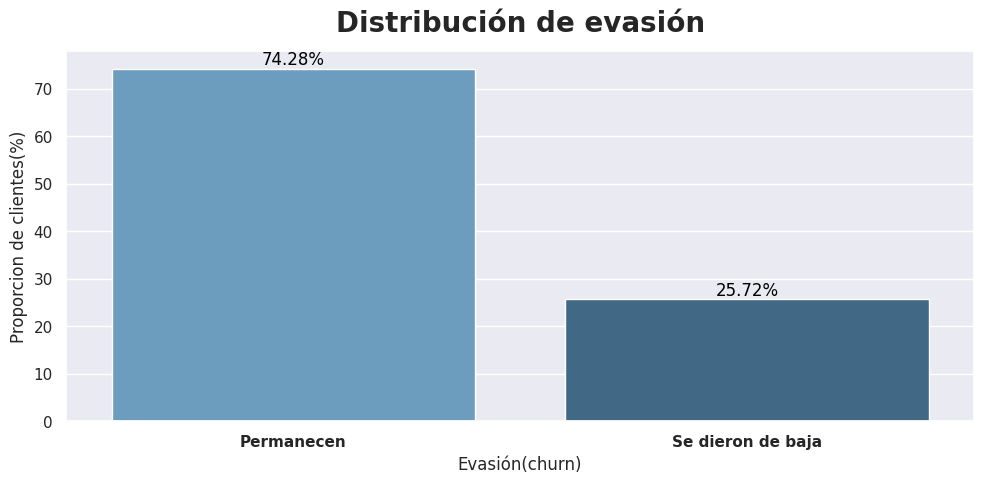

In [49]:
# Establecer la configuración seaborn
sns.set()

# Usar la variable creada anteriormente 'pivotado'
# Definir las etiquetas
labels=['Permanecen', 'Se dieron de baja']  # Etiquetas para los valores 0 y 1
values = pivotado.loc['abandono'].values  # Extraer los valores de las proporciones

# Definir el lienzo y los gráficos
fig, ax = plt.subplots(figsize=(10,5))

# Crear gráfico de barras
sns.barplot(x=labels, y=values, ax=ax, palette='Blues_d')

# Títulos y etiquetas
ax.set_title('Distribución de evasión', fontweight='bold', fontsize=20, y=1.03)
ax.set_xlabel('Evasión(churn)')
ax.set_ylabel('Proporcion de clientes(%)')
ax.set_xticklabels(labels, fontweight='bold')

#Colocar proporciones en las barras
for i, value in enumerate(values):
  ax.text(i, value, f'{value:.2f}%', color='black', ha='center', va='bottom', fontsize=12)

# Ajustar gráfico y mostrar
plt.tight_layout()
plt.show()

## **Recuento de evasión por variables categóricas**

* Descripción:

 *  Explorar cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

 * Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

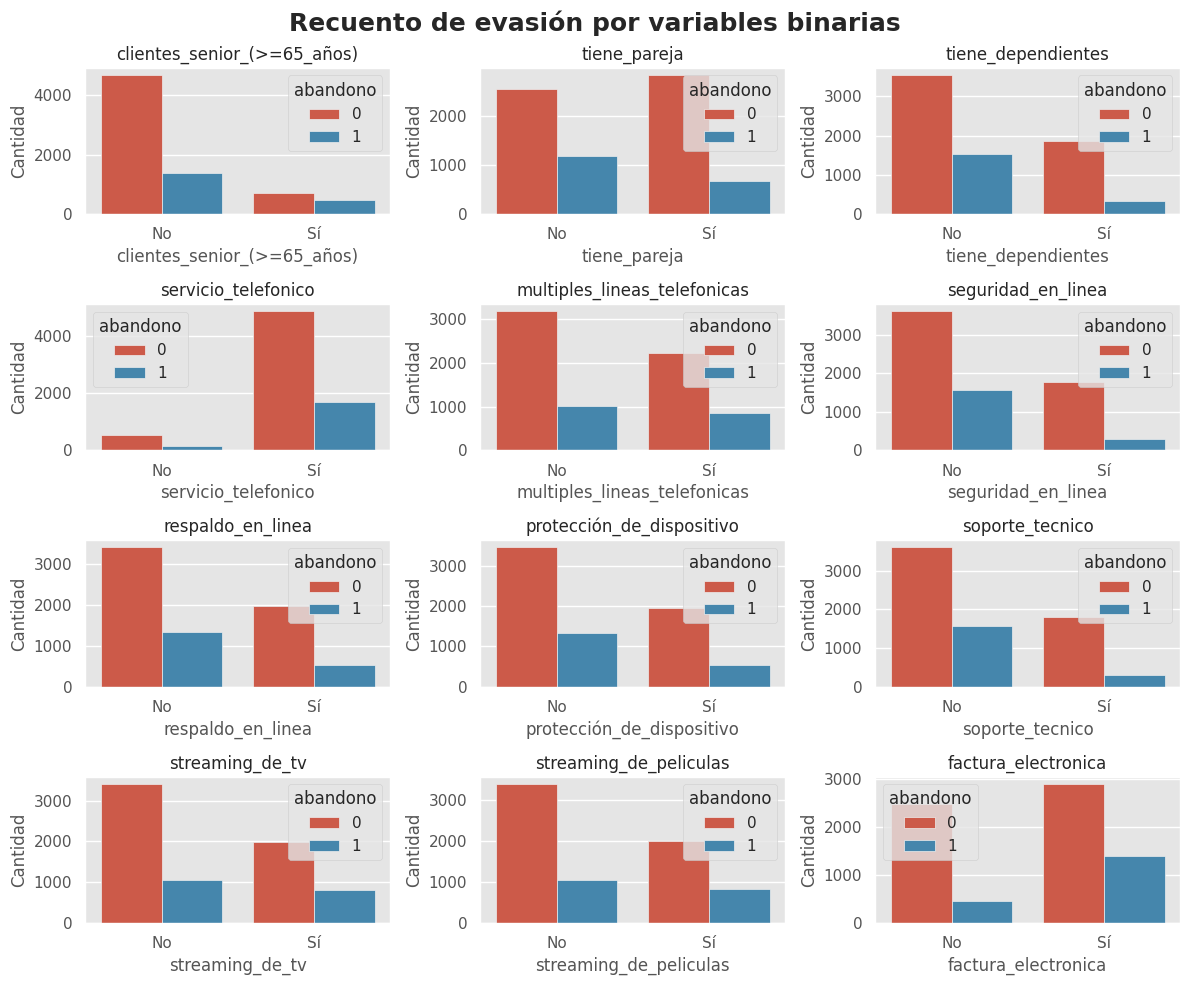

In [93]:
# Lista de variables binarias a analizar
# Filtramos las columnas que sean de tipo 'int' y además tengas solo 2 valores(1:si, 0:no)
variables_x =[col for col in df.columns if df[col].dtype=='int' and df[col].nunique()==2 and col !='abandono']

# Ajustar el estilo
with plt.style.context('ggplot'):

  # Crear figura con 3 filas y 4 columnas
  fig, axes = plt.subplots(4,3,figsize=(12,10))
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  fig.suptitle('Recuento de evasión por variables binarias', fontsize=18, fontweight='bold')
  axes = axes.flatten() # Aplanar array de ejes

  # Recorrer las variables y graficar:
  for i, var in enumerate(variables_x):
    ax = axes[i]
    sns.countplot(data=df, x=var, hue='abandono', ax=ax)
    ax.set_title(f'{var}', fontsize=12)
    ax.set_ylabel('Cantidad')
    ax.set_xticklabels(['No', 'Sí']) #Porque son variables binarias

  # Ocultar subplots vacíos si hay más o menos variables binarias
  for j in range(len(variables_x), len(axes)):
      fig.delaxes(axes[j])

  #Ajustar y mostrar el gráfico
  plt.tight_layout()
  plt.show()


## **📄Informe final**